In [1]:
!mkdir -p /scratch/sagarsj42/torch-cache
!mkdir -p /scratch/sagarsj42/transformers

import os
os.chdir('/scratch/sagarsj42')
os.environ['TORCH_HOME'] = '/scratch/sagarsj42/torch-cache'
os.environ['TRANSFORMERS_CACHE'] = '/scratch/sagarsj42/transformers'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from transformers import BertTokenizer

In [3]:
irse_df = pd.read_csv('IRSE_FIRE_2022_Track_Training_Data_preprocessed.csv')

print(irse_df.info())

irse_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Comments                  8047 non-null   object
 1   Surrounding Code Context  8047 non-null   object
 2   Class                     8047 non-null   object
dtypes: object(3)
memory usage: 188.7+ KB
None


,Comments,Surrounding Code Context,Class
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
5,/*argv1 = URL\n * argv2 = proxy\n * argv3 = no...,"-9. *\n-8. * You may opt to use, copy, modif...",Not Useful
6,/*enable ascii/text mode*/,"-10. if(!curl) {\n-9. fprintf(stderr, ""c...",Not Useful
7,/*100 ms*/,"-10. multi_add_handle(mhandle, handle);\n-9....",Not Useful
8,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful
9,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful


In [4]:
comments = irse_df['Comments'].tolist()
contexts = irse_df['Surrounding Code Context']

len(comments), len(contexts)

(8047, 8047)

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [6]:
comments_tok = [tokenizer.tokenize(c) for c in comments]
contexts_tok = [tokenizer.tokenize(c) for c in contexts]

len(comments_tok), len(contexts_tok)

(8047, 8047)

In [7]:
comments_tok[200], contexts_tok[200]

(['/',
  '*',
  'try',
  'to',
  'deal',
  'with',
  'cr',
  '##lf',
  'or',
  'just',
  'l',
  '##f',
  '*',
  '/'],
 ['-',
  '10',
  '.',
  'log',
  '##ms',
  '##g',
  '(',
  '"',
  'instructed',
  'to',
  'reject',
  'expect',
  ':',
  '100',
  '-',
  'continue',
  '"',
  ')',
  ';',
  '-',
  '9',
  '.',
  're',
  '##q',
  '-',
  '>',
  'no',
  '##ex',
  '##pe',
  '##ct',
  '=',
  'true',
  ';',
  '-',
  '8',
  '.',
  '}',
  '-',
  '7',
  '.',
  'else',
  'if',
  '(',
  '1',
  '=',
  '=',
  'ss',
  '##can',
  '##f',
  '(',
  'cm',
  '##d',
  ',',
  '"',
  'write',
  '##del',
  '##ay',
  ':',
  '%',
  'd',
  '"',
  ',',
  '&',
  'nu',
  '##m',
  ')',
  ')',
  '{',
  '-',
  '6',
  '.',
  'log',
  '##ms',
  '##g',
  '(',
  '"',
  'instructed',
  'to',
  'delay',
  '%',
  'd',
  'sec',
  '##s',
  'between',
  'packets',
  '"',
  ',',
  'nu',
  '##m',
  ')',
  ';',
  '-',
  '5',
  '.',
  're',
  '##q',
  '-',
  '>',
  'write',
  '##del',
  '##ay',
  '=',
  'nu',
  '##m',
  ';',
  '-',
  

In [8]:
comments_tok_lens = np.array([len(c) for c in comments_tok])
contexts_tok_lens = np.array([len(c) for c in contexts_tok])

comments_tok_lens.mean(), comments_tok_lens.std(), np.median(comments_tok_lens), \
    comments_tok_lens.min(), comments_tok_lens.max()

(31.159935379644587, 57.68057070629073, 12.0, 5, 1001)

In [9]:
contexts_tok_lens = np.array([len(c) for c in contexts_tok])

contexts_tok_lens.mean(), contexts_tok_lens.std(), np.median(contexts_tok_lens), \
    contexts_tok_lens.min(), contexts_tok_lens.max()

(182.41468870386478, 130.51177389269245, 163.0, 9, 5741)

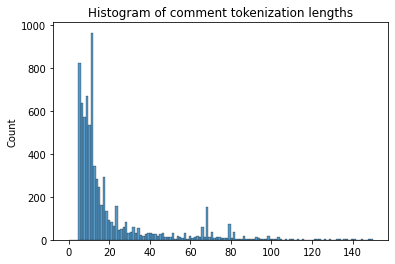

In [10]:
sns.histplot(comments_tok_lens, binrange=(0, 150))
plt.title('Histogram of comment tokenization lengths')
plt.show()

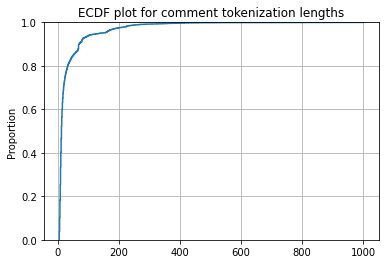

In [11]:
sns.ecdfplot(comments_tok_lens)
plt.grid(which='both')
plt.title('ECDF plot for comment tokenization lengths')
plt.show()

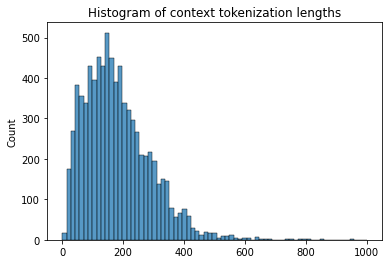

In [12]:
sns.histplot(contexts_tok_lens, binrange=(0, 1000))
plt.title('Histogram of context tokenization lengths')
plt.show()

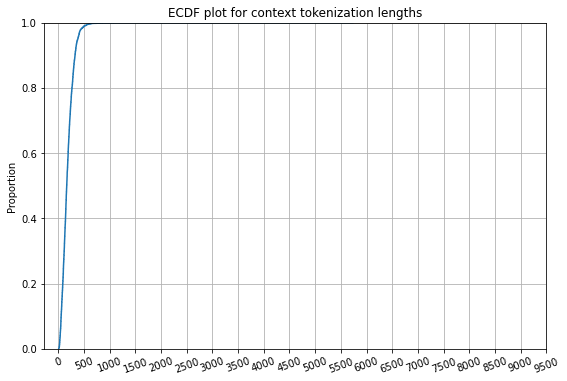

In [13]:
plt.figure(figsize=(9, 6))
sns.ecdfplot(contexts_tok_lens)
plt.grid(which='both')
plt.title('ECDF plot for context tokenization lengths')
plt.xticks(list(range(0, 10000, 500)), rotation=20)
plt.show()

In [16]:
irse_df['Class'].value_counts(), irse_df['Class'].value_counts(normalize=True)

(Useful        4337
 Not Useful    3710
 Name: Class, dtype: int64,
 Useful        0.538959
 Not Useful    0.461041
 Name: Class, dtype: float64)

In [17]:
irse_df.drop_duplicates()['Class'].value_counts(), \
    irse_df.drop_duplicates()['Class'].value_counts(normalize=True)

(Useful        3384
 Not Useful    2565
 Name: Class, dtype: int64,
 Useful        0.568835
 Not Useful    0.431165
 Name: Class, dtype: float64)